# Stock Price Prediction

- Recurrent Neural Network (RNN)
- Long short-term Memory (LSTM)

## Importing libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
import sklearn
import keras

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

## Versions of Libraries

In [10]:
# Python version
import sys
print('Python: {}'.format(sys.version))

# numpy
print('numpy: {}'.format(np.__version__))

# matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

# pandas
print('pandas: {}'.format(pd.__version__))

# scikit-learn
print('sklearn: {}'.format(sklearn.__version__))

# keras
print('keras: {}'.format(keras.__version__))

Python: 3.8.5 (tags/v3.8.5:580fbb0, Jul 20 2020, 15:57:54) [MSC v.1924 64 bit (AMD64)]
numpy: 1.18.5
matplotlib: 3.3.1
pandas: 1.1.1
sklearn: 0.23.2
keras: 2.7.0


## Choosing Data

Yahoo Finance

## Loading data

In [11]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000


## Feature Extraction

In [12]:
df.shape

(2392, 7)

Use one variable which is the “open” price.

In [13]:
df = df['Open'].values
df = df.reshape(-1, 1)

df

array([[ 5.      ],
       [ 4.6     ],
       [ 4.      ],
       ...,
       [87.      ],
       [85.758003],
       [81.      ]])

split the data into training and testing sets

In [14]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

MinMaxScaler to scale our data between zero and one. 

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [18]:
# Helper function to create dataset

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

For the features (x), we will always append the last 50 prices  
for the label (y), we will append the next price.   
Then we will use numpy to convert it into an array.

In [19]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

Next, we need to reshape our data to make it a 3D array in order to use it in LSTM Layer.

In [20]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Model Building

In [21]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

First, we initialized our model as a sequential one with 96 units in the output’s dimensionality. We used return_sequences=True to make the LSTM layer with three-dimensional input and input_shape to shape our dataset.

Making the dropout fraction 0.2 drops 20% of the layers. Finally, we added a dense layer with a value of 1 because we want to output one value.

After that, we want to reshape our feature for the LSTM layer, because it is sequential_3 which is expecting 3 dimensions, not 2:



In [22]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Compile Model

In [23]:
model.compile(loss='mean_squared_error', optimizer='adam')

We used loss='mean_squared_error' because it is a regression problem, and the adam optimizer to update network weights iteratively based on training data.

## Start Training Model and Save It

In [24]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')


Epoch 1/50
59/59 [==============================] - 18s 120ms/step - loss: 0.0206
Epoch 2/50
59/59 [==============================] - 6s 108ms/step - loss: 0.0035
Epoch 3/50
59/59 [==============================] - 6s 107ms/step - loss: 0.0033
Epoch 4/50
59/59 [==============================] - 6s 109ms/step - loss: 0.0028
Epoch 5/50
59/59 [==============================] - 6s 97ms/step - loss: 0.0028
Epoch 6/50
59/59 [==============================] - 6s 96ms/step - loss: 0.0028
Epoch 7/50
59/59 [==============================] - 6s 94ms/step - loss: 0.0026
Epoch 8/50
59/59 [==============================] - 6s 97ms/step - loss: 0.0023
Epoch 9/50
59/59 [==============================] - 6s 94ms/step - loss: 0.0029
Epoch 10/50
59/59 [==============================] - 6s 93ms/step - loss: 0.0025
Epoch 11/50
59/59 [==============================] - 5s 90ms/step - loss: 0.0026
Epoch 12/50
59/59 [==============================] - 5s 91ms/step - loss: 0.0024
Epoch 13/50
59/59 [=============

Every epoch refers to one cycle through the full training dataset, and batch size refers to the number of training examples utilized in one iteration.

In [25]:
model = load_model('stock_prediction.h5')

## Result Visualization

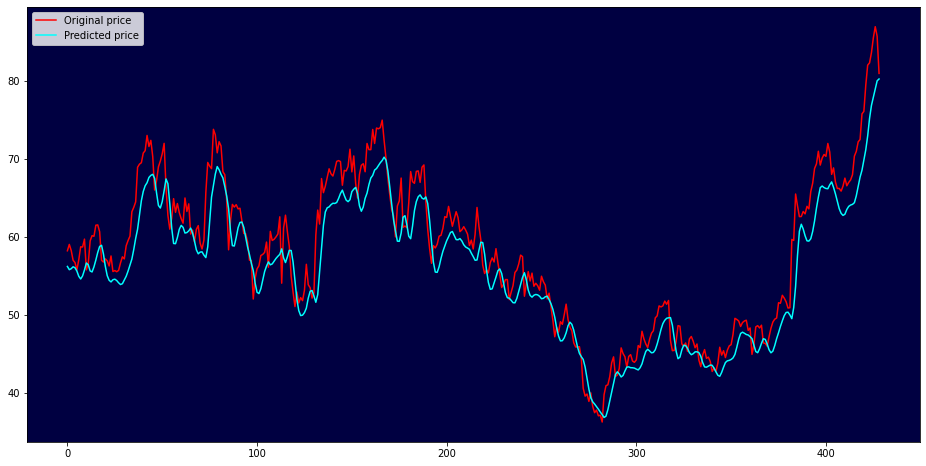

In [26]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

## Acknowledgements

- [Building a Stock Price Predictor Using Python](https://www.section.io/engineering-education/stock-price-prediction-using-python/)